# Importing the music files to predict

Attached to the dataset utilised for this ML project, there was the code utilised to extract the music features from the music files (https://github.com/Insiyaa/Music-Tagging)
The features are extracted using the Python library "librosa" (https://librosa.org/).
Good explanation of features extracted can be found here (https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d).
The features utilised are:
- tempo, beats (track beats detection)
- chromagram (chromagram form a waveform)
- rms (root-mean-square value for each frame of audio)
- spectral centroid (the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound)
- spectral bandwidth
- spectral rolloff (the frequency below which a specified percentage of the total spectral energy lies)
- mfcc - Mel-Frequency Cepstral Coefficients (MFCCs are a small set of features which concisely describe the overall shape of a spectral envelope)

In [36]:
## importing the necessary libraries
import os
import csv
import time
import librosa
import numpy as np

In [37]:
# initializing the dataset columns
header = 'filename tempo beats chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [38]:
file = open('datasets/test_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for filename in os.listdir('./doriacat'):
    songname = f'./doriacat/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=180) ## changed to 120 seconds from the parameters utilized for the dataset given the songs loaded. Original was 30.
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr) 
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
    rmse = librosa.feature.rms(y=y) 
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {tempo} {beats.shape[0]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += ' 1'
    file = open('datasets/test_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: P

In [30]:
audio_path = './doriacat/golden.mp3'
x, sr = librosa.load(audio_path, sr=44100)
print(type(x), type(sr))

/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


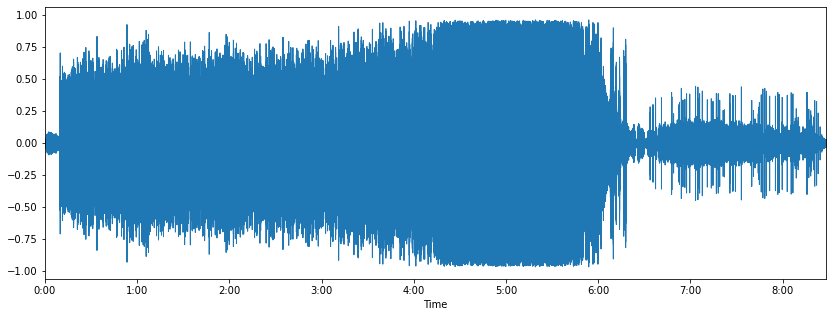

In [33]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.savefig('plots/waveplot_hair.png')

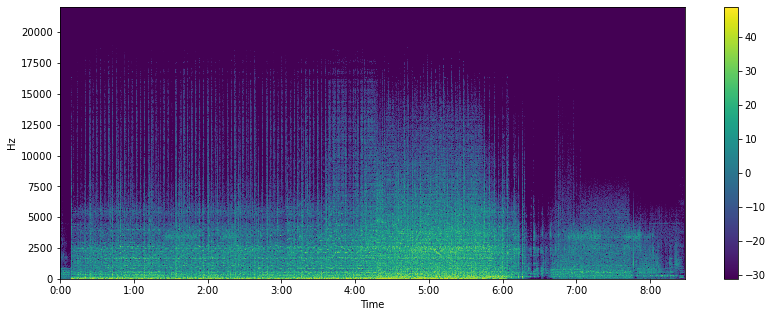

In [32]:
#display Spectrogram Golden Hair
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap = "viridis") 
plt.colorbar()
plt.savefig('plots/spectrogram_hair.png')

/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


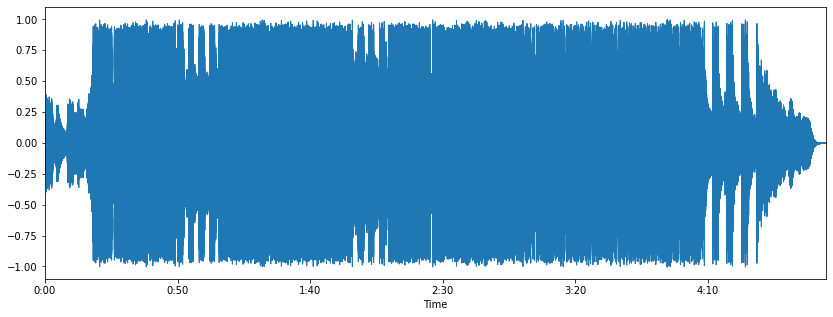

In [34]:
audio_path = './doriacat/tumbleweeds.mp3'
x, sr = librosa.load(audio_path, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.savefig('plots/waveplot_tumbleweed.png')

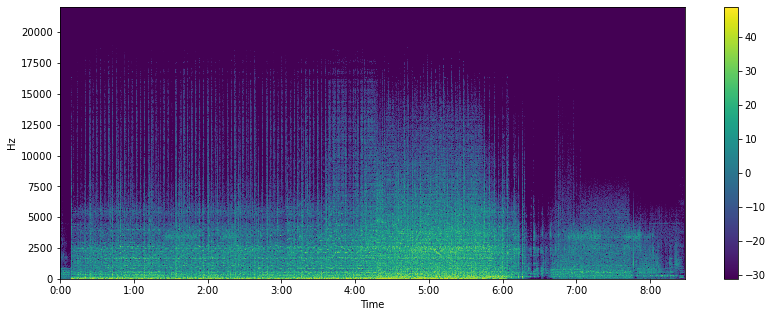

In [26]:
## Spectrogram Tumbleweeds
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap = "viridis") 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.savefig('plots/spectrogram_tumbleweed.png')

/Users/dorianeve/opt/anaconda3/envs/CSML21/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


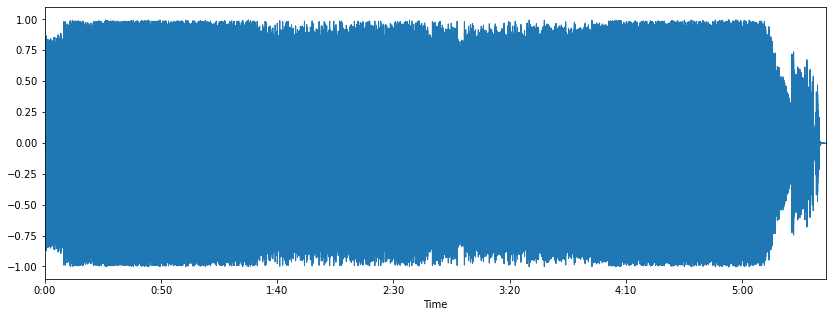

In [27]:
audio_path = './doriacat/path.mp3'
x, sr = librosa.load(audio_path, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.savefig('plots/waveplot_path.png')

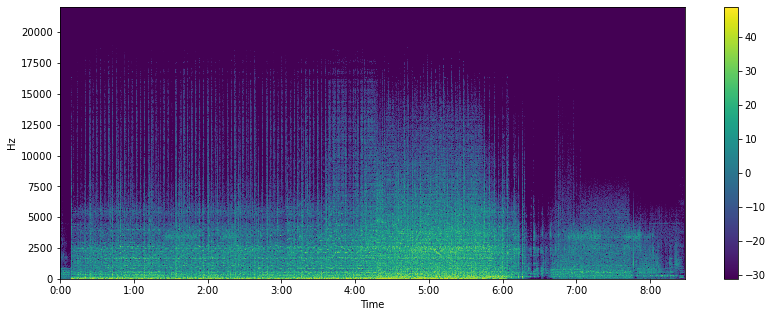

In [35]:
## Display Spectrogram The Path
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap = "viridis") 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.savefig('plots/spectrogram_path.png')